#**Exploratory Data Analsis**

Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [53]:
#read data
data = pd.read_excel('/content/data.xlsx')

In [ ]:
data

We will label the sentiment negative/positive based on the rating score given. Therefore, let's look at the proportion of each rating score first

In [55]:
data['score'].value_counts()

5    18340
1     6280
4     1892
3     1858
2     1749
Name: score, dtype: int64

Then scores 1-3 will be labeled negative and score 4-5 will be labeled positive

In [56]:
#make a new column with the value if the score 1-3 as the negative and the score 4-5 as the positive
data['value'] = data['score'].apply(lambda x:'positive' if x>3 else 'negative')

In [ ]:
data

Next, we try to display the amount of each data in each month

In [58]:
df = data.sort_values(by=['Year','Month'])

In [59]:
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [64]:
mmap = {1:'Jan21',2:'Feb21', 3:'Mar21', 4:'Apr21', 5:'May21', 6:'Jun21', 7:'Jul21',8:'Aug21'}

In [65]:
df['MonthName'] = df['Month'].map(mmap)

In [66]:
df = df.reset_index(drop=True)

In [ ]:
df

In [68]:
print('Data amount of January 2021 : {}'.format(df[df['MonthName']=='Jan21'].count()[1]))
print('Data amount of February 2021 : {}'.format(df[df['MonthName']=='Feb21'].count()[1]))
print('Data amount of March 2021 : {}'.format(df[df['MonthName']=='Mar21'].count()[1]))
print('Data amount of April 2021 : {}'.format(df[df['MonthName']=='Apr21'].count()[1]))
print('Data amount of May 2021 : {}'.format(df[df['MonthName']=='May21'].count()[1]))
print('Data amount of June 2021 : {}'.format(df[df['MonthName']=='Jun21'].count()[1]))
print('Data amount of July 2021 : {}'.format(df[df['MonthName']=='Jul21'].count()[1]))
print('Data amount of August 2021 : {}'.format(df[df['MonthName']=='Aug21'].count()[1]))

Data amount of January 2021 : 4045
Data amount of February 2021 : 3906
Data amount of March 2021 : 5861
Data amount of April 2021 : 3819
Data amount of May 2021 : 3468
Data amount of June 2021 : 4560
Data amount of July 2021 : 3894
Data amount of August 2021 : 566


because the amount of data in August is to far from amount of data in other months , it is not used

In [69]:
df = df[df['MonthName']!= 'Aug21']

In [ ]:
df

In [71]:
#Get the dummy variable for value
dummy = pd.get_dummies(df['value'],prefix='value')

In [72]:
df = pd.concat([df,dummy], axis=1)

In [73]:
#Updating the order of the columns in the dataframe
df = df[['Comment','Month','Year','MonthName','score','value','value_negative','value_positive']]

In [ ]:
df

To make it easier to see the proportion of negative and positive label data for each month, a pivot table is made

In [75]:
monthly = df.groupby(['Year','Month','MonthName']).sum().drop(columns='score')

In [76]:
monthly

value_negative  value_positive
Year Month MonthName                                
2021 1     Jan21              1273.0          2772.0
     2     Feb21              1218.0          2688.0
     3     Mar21              2086.0          3775.0
     4     Apr21              1131.0          2688.0
     5     May21              1106.0          2362.0
     6     Jun21              1587.0          2973.0
     7     Jul21              1256.0          2638.0

In [77]:
monthly['negative_proportion'] = monthly['value_negative']/(monthly['value_negative']+monthly['value_positive'])

In [78]:
monthly

value_negative  value_positive  negative_proportion
Year Month MonthName                                                     
2021 1     Jan21              1273.0          2772.0             0.314710
     2     Feb21              1218.0          2688.0             0.311828
     3     Mar21              2086.0          3775.0             0.355912
     4     Apr21              1131.0          2688.0             0.296151
     5     May21              1106.0          2362.0             0.318916
     6     Jun21              1587.0          2973.0             0.348026
     7     Jul21              1256.0          2638.0             0.322548

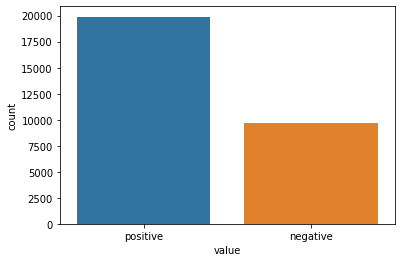

In [79]:
#Visualize the proportion of value
sns.countplot(x='value',data=df)

#**Sentiment Analysis**

In [89]:
pip install 'Sastrawi'

     |████████████████████████████████| 209 kB 4.2 MB/s 


## Cleansing and Preprocessing Data

In [91]:
import re
import string

In [92]:
#df2 is the dataframe that we use to make sentiment analysis model
df2 = df[['Comment','value']]

In [ ]:
df2.head()

In [ ]:
#Convert value to nominal data
df2.loc[df['value']=='positive','value']=1
df2.loc[df['value']=='negative','value']=0

For more easier, we can define function to clean the data

In [95]:
def cleansing(data):
  #Case Folding : lowercase
  data = data.lower()

  #Case Folding : remove number
  data = re.sub(r'\d+','',data)

  #Case Folding : remove punctuation
  data = data.translate(str.maketrans('','', string.punctuation))

  #Case Folding : remove whitespace
  data = data.strip()

  #Remove ASCII and unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'',data)

  #Remove newline
  data = data.replace('\n','')

  return data  


In [ ]:
#Apply the cleansing function
review = []
for index, row in df2.iterrows():
  review.append(cleansing(row['Comment']))

df2['Comment'] = review

In [ ]:
df2

Next step we can use stopword remover

In [98]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
#Apply the stopword remover
review = []
for index, row in df2.iterrows():
  review.append(stopword.remove(row['Comment']))

df2['Comment'] = review

For the stemming step, we can use StemmerFactory from the Sastrawi library

In [100]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemfactory = StemmerFactory()
stemmer = stemfactory.create_stemmer()

#Apply the stemmer
review = []
for index, row in df2.iterrows():
  review.append(stemmer.stem(row['Comment']))

df2['Comment'] = review

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


The cleansing, stopword and stemming processes can result in empty or missing data.

In [101]:
#change the value of missing data to nan
df3 = df2.replace('',np.nan, regex=True)

In [102]:
#drop the missing value data
df3.dropna(inplace=True)

In [103]:
df3 = df3.reset_index()

In [106]:
df3.drop(columns='index', inplace=True)

In [ ]:
df3

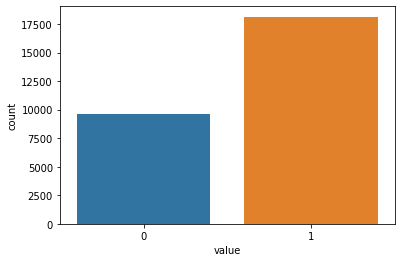

In [108]:
sns.countplot(x='value',data=df3)

In [111]:
df3[df3['value']==0].count()

Comment    9615
value      9615
dtype: int64

The number of data classes to be labeled is not balanced, so the data imbalance is handled by using resampling. The sample taken is 10000 data on each label

In [112]:
sample_0 = df3[df3['value']==0].sample(9500, replace=True)
sample_1 = df3[df3['value']==1].sample(9500, replace=True)
df4 = pd.concat([sample_0,sample_1])

In [113]:
df4 = df4.reset_index()
df4.drop(columns='index', inplace=True)

In [ ]:
df4

In [115]:
df4['value'].value_counts()

1    9500
0    9500
Name: value, dtype: int64

### Modeling 

In [117]:
from sklearn.model_selection import train_test_split
#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df4['Comment'], df4['value'],
                                                    test_size = 0.2, stratify=df4['value'], random_state = 42)

In [118]:
#For the vctorization, we use the TF-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [119]:
#Define function to preprocessing data
def preprocessing(data):
  #Cleansing
  data = cleansing(data)

  #Stopwords
  factory= StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #Stemming
  stemfactory = StemmerFactory()
  stemmer = stemfactory.create_stemmer()
  data = stemmer.stem(data)

  #Vectorizer
  data = vectorizer.transform([data])

  return data

In [120]:
#define SVM model
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel = 'linear')

In [121]:
#fit and predict model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score

In [123]:
#Show the classification report
print('f1-score  : {}'.format(f1_score(y_test,predict)))
print('')
print('Accuracy score  : {}'.format(accuracy_score(y_test,predict)))
print('')
print('Precission score  : {}'.format(precision_score(y_test,predict)))
print('')
print('Recall score hasil  : {}'.format(recall_score(y_test,predict)))

f1-score  : 0.9080962800875274

Accuracy score  : 0.911578947368421

Precission score  : 0.9453302961275627

Recall score hasil  : 0.8736842105263158


In [124]:
confusion_matrix(y_test,predict)

array([[1804,   96],
       [ 240, 1660]])

From the Confusion matrix, we can see the sum of

* True Positif = 1804
* False Positif = 96
* False Negatif = 240
* True Negatif = 1660

### Test Classification Model

In [125]:
test1 = 'boleh juga ni, walau size ringan'

In [126]:
clf.predict(preprocessing(test1))

array([1])

In [127]:
test2 = 'Bagus nih, bagusnya gak usah di download'

In [ ]:
clf.predict(preprocessing(test2))

array([0])

#**DMAIC**

In [80]:
monthly

value_negative  value_positive  negative_proportion
Year Month MonthName                                                     
2021 1     Jan21              1273.0          2772.0             0.314710
     2     Feb21              1218.0          2688.0             0.311828
     3     Mar21              2086.0          3775.0             0.355912
     4     Apr21              1131.0          2688.0             0.296151
     5     May21              1106.0          2362.0             0.318916
     6     Jun21              1587.0          2973.0             0.348026
     7     Jul21              1256.0          2638.0             0.322548

In [81]:
list_total = [4048,3905,5865,3820,3472,4567,3815]
dmaic = pd.DataFrame(list_total)
dmaic = dmaic.rename(columns={0:'TotalData'}) 
monthly2 = monthly.copy()
monthly2.reset_index(inplace=True)
monthly2 = monthly2[['MonthName','value_negative']]
dmaic = pd.concat([monthly2,dmaic], axis=1)
dmaic.set_index('MonthName', inplace=True)

In [82]:
dmaic

,value_negative,TotalData
MonthName,,
Jan21,1273.0,4048
Feb21,1218.0,3905
Mar21,2086.0,5865
Apr21,1131.0,3820
May21,1106.0,3472
Jun21,1587.0,4567
Jul21,1256.0,3815


In [83]:
dmaic['p'] = dmaic['value_negative']/dmaic['TotalData']
dmaic

,value_negative,TotalData,p
MonthName,,,
Jan21,1273.0,4048,0.314476
Feb21,1218.0,3905,0.311908
Mar21,2086.0,5865,0.355669
Apr21,1131.0,3820,0.296073
May21,1106.0,3472,0.318548
Jun21,1587.0,4567,0.347493
Jul21,1256.0,3815,0.329227


In [84]:
p = sum(dmaic['p'])/7
p

0.3247706607313083

In [85]:
dmaic['UCL'] = p + (3*np.sqrt((p*(1-p))/7))
dmaic['LCL'] = p - (3*np.sqrt((p*(1-p))/7))

In [38]:
dmaic

,value_negative,TotalData,p,UCL,LCL
MonthName,,,,,
Jan21,1273.0,4048,0.314476,0.855761,-0.206219
Feb21,1218.0,3905,0.311908,0.855761,-0.206219
Mar21,2086.0,5865,0.355669,0.855761,-0.206219
Apr21,1131.0,3820,0.296073,0.855761,-0.206219
May21,1106.0,3472,0.318548,0.855761,-0.206219
Jun21,1587.0,4567,0.347493,0.855761,-0.206219
Jul21,1256.0,3815,0.329227,0.855761,-0.206219


The value on the minus LCL is made to 0 because there are no defects per
unit product minus the number. The minimum number of defects per unit is 0.

In [86]:
dmaic['LCL'] = 0
dmaic['CL'] = p

In [87]:
dmaic

,value_negative,TotalData,p,UCL,LCL,CL
MonthName,,,,,,
Jan21,1273.0,4048,0.314476,0.855761,0,0.324771
Feb21,1218.0,3905,0.311908,0.855761,0,0.324771
Mar21,2086.0,5865,0.355669,0.855761,0,0.324771
Apr21,1131.0,3820,0.296073,0.855761,0,0.324771
May21,1106.0,3472,0.318548,0.855761,0,0.324771
Jun21,1587.0,4567,0.347493,0.855761,0,0.324771
Jul21,1256.0,3815,0.329227,0.855761,0,0.324771


In [90]:
DPMO = sum(dmaic['value_negative'])/sum(dmaic['TotalData'])*1000000
DPMO

327444.7307744473